# Small Samples and The T-test 

T-tests are probably some of the most commonly used and taught statistical tools in the world. We use them when a sample's variance is unkown and too small to warrant a normal approximation (as shown by the central limit theorem). Many textbooks are loaded with small sample problems which leads early practitioners to believe the t-test is an all-in-one solution. More concerning is that power-tests are sometimes treated as an after thought rather than an essential part of the test itself.
<p>
In this notebook I'll share some simulations I created to give myself some intution for the efficacy of the t-test. We'll dig a bit into the theory and uncover some paradoxes. The theoretical portion of this piece assumes the reader is familiar with the theory behind statistics but if not the results will still be interesting.
</p>
<p>
To examine the t-test we simulate samples from a normally distributed population (we will consider standard deviation notation):
<br/>
<br/>
$$X \sim N(60, 1)$$
</p>

In [12]:
using HypothesisTests, Distributions, Gadfly

In [24]:
X = Normal(60, 5)

Normal(μ=60.0, σ=5.0)

We consider a one sample t-test where $H_0: \mu = 61$ and $H_1: \mu \neq 61$. We expect to reject our null given our population distribution. However if you perform this test over and over you'll find about 20% of the time we do not reject. 

In [25]:
OneSampleTTest(rand(X, 10), 61)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         61
    point estimate:          60.361286777287624
    95% confidence interval: (55.786464594330596,64.93610896024465)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.759332198098178 (not signficant)

Details:
    number of observations:   10
    t-statistic:              -0.31583078728511466
    degrees of freedom:       9
    empirical standard error: 2.0223272981166986


To better understand what's happening we will simulate the a large number of t-tests and count the null rejections.

In [3]:
function rejections(X, n, q, h₀)
    r = 0
    for i = 1:n
        interval = ci(OneSampleTTest(rand(X, q), h₀))
        if (!(h₀ >= interval[1] && h₀ <= interval[2]))
            r = r + 1
        end
    end
    r
end

rejections (generic function with 1 method)

Here we simulate the 1000 of the t-tests we performed above. Indeed about 80% of the time we reject.

In [20]:
rejections(Normal(60, 1), 1000, 10, 61) / 1000

0.802

Let's plot the simulation over sample size:

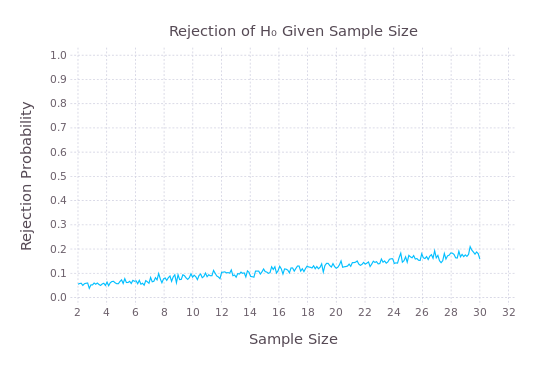

In [27]:
samplesize = plot(x -> rejections(X, 1000, convert(Int, floor(x)), 61) / 1000, 
2, 30, 
Guide.xlabel("Sample Size"), 
Guide.ylabel("Rejection Probability"), 
Guide.title("Rejection of H₀ Given Sample Size"),
Guide.xticks(ticks = [2:2:32]),
Guide.yticks(ticks = [0:.1:1])) 

In [6]:
draw(PNG("samplesize.png", 5inch, 3inch), samplesize)

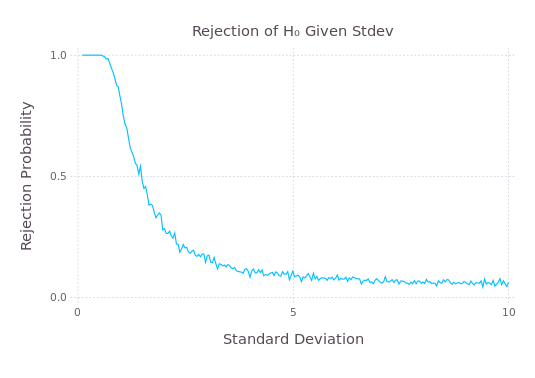

In [8]:
stdev = plot(x -> rejections(Normal(60, x), 1000, 10, 61) / 1000, .1, 10,
Guide.xlabel("Standard Deviation"), Guide.ylabel("Rejection Probability"), Guide.title("Rejection of H₀ Given Stdev"))

In [9]:
draw(PNG("stdev.png", 5inch, 3inch), stdev)

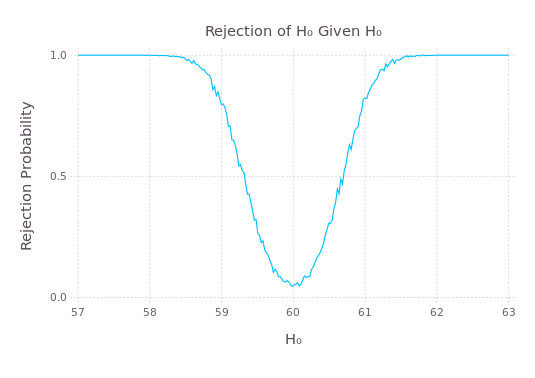

In [10]:
nullhyp = plot(x -> rejections(Normal(60, 1), 1000, 10, x) / 1000, 57, 63,
Guide.xlabel("H₀"), Guide.ylabel("Rejection Probability"), Guide.title("Rejection of H₀ Given H₀"))

In [11]:
draw(PNG("nullhyp.png", 5inch, 3inch), nullhyp)